# Supernovae distances and redshift

## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import GridSearchCV

/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


Sampling the dataset and plot it

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_55384/2533858147.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


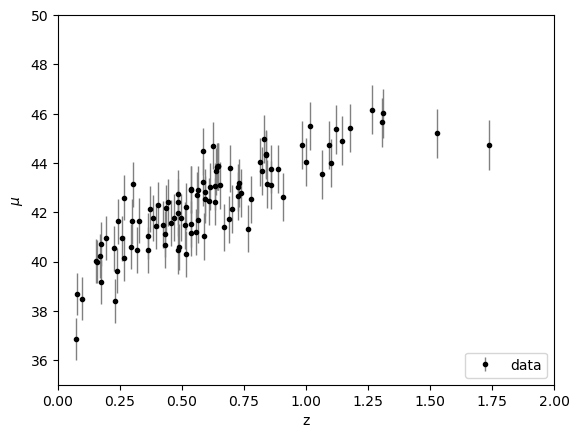

In [2]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

## Linear Regression

First of all, let's try to fit it with a straight line

Intercept:  [39.60456481]
Angular coefficient:  [[4.5911933]]


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/451863165.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


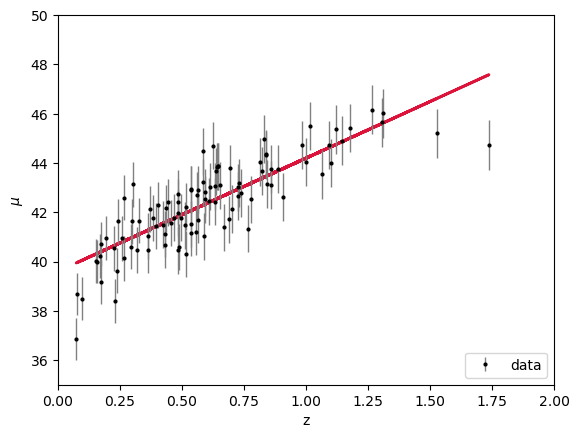

In [5]:
L_R = LinearRegression()
L_R.fit(z_sample[:, np.newaxis], mu_sample[:, np.newaxis], sample_weight = dmu)

p_0 = L_R.intercept_
p_1 = L_R.coef_

fig = plt.figure()
plt.plot(z_sample[:, np.newaxis], L_R.predict(z_sample[:, np.newaxis]), color = 'crimson', lw = 2)
plt.errorbar(z_sample, mu_sample, dmu, ls ='', marker = 'o', markersize = 2, c = 'black', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

print('Intercept: ', p_0)
print('Angular coefficient: ', p_1)

## Polynomial regression

Here I try a polynomial regression with different degrees, in this case I used the sklearn implementation

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/1948990489.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


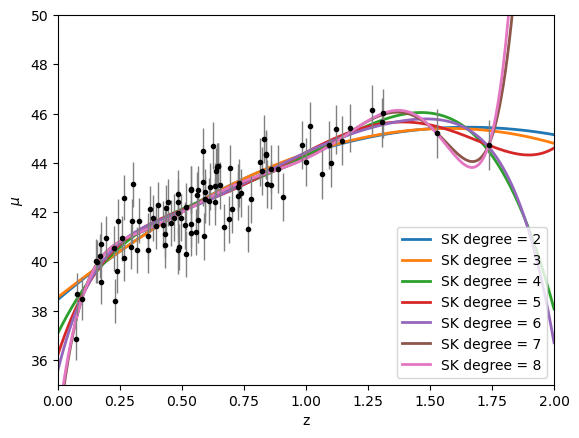

In [6]:

degrees = np.linspace(2, 8, num = 7, dtype = int)
z_grid = np.linspace(0, 2, 1000)

fig = plt.figure()

for deg in degrees:

    # Here I make my sample ready to be fitted with a polynomial 
    P_R = PolynomialFeatures(deg)
    P_R.fit(z_sample[:, np.newaxis], mu_sample[:, np.newaxis]) 
    z_poly = P_R.transform(z_grid[:, np.newaxis])
    X_poly = P_R.transform(z_sample[:, np.newaxis])

    # Here I fit with a polynomial using the Linear regression
    L_R_poly = LinearRegression()
    L_R_poly.fit(X_poly, mu_sample[:, np.newaxis], sample_weight = dmu)

    plt.plot(z_grid, L_R_poly.predict(z_poly), lw = 2, label = f'SK degree = {deg}') # color = 'crimson'
        
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.legend(loc='lower right')
    plt.xlim(0,2)
    plt.ylim(35,50)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.show()


I guess the best result is 2/3 degree of the polinomial. With more than 10-12 you are overfitting, with 1 degree polinomial you are underfitting

## Astropy Polinomial regression 

This is the astropy implementation, which is much easier; I'll use this one also for the CV

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/2179745172.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


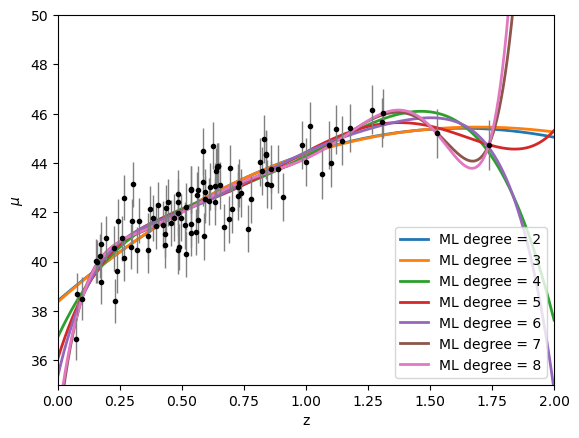

In [7]:
plt.figure()

for deg in degrees:

    model = PolynomialRegression(deg) 
    model.fit(z_sample[:, np.newaxis], mu_sample, y_error = dmu)
    plt.plot(z_grid, model.predict(z_grid[:, np.newaxis]), lw = 2, label = f'ML degree = {deg}') # color = 'crimson'
        
    plt.xlabel("z")
    plt.ylabel("$\mu$")
    plt.legend(loc='lower right')
    plt.xlim(0,2)
    plt.ylim(35,50)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.show()

#print(model.coef_)


<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/1119882505.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


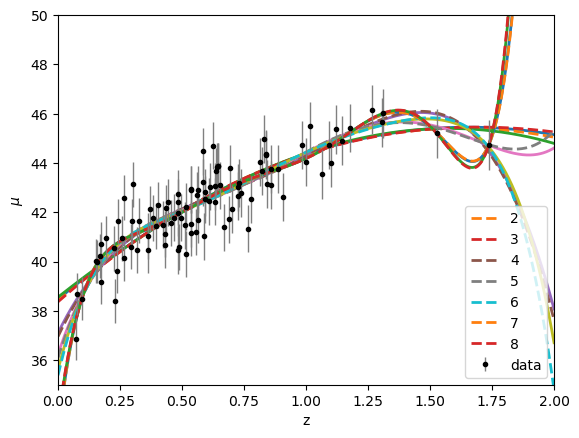

In [8]:
# Comparison Astropy vs Sklearn

plt.figure()

for deg in degrees:

    P_R = PolynomialFeatures(deg)
    P_R.fit(z_sample[:, np.newaxis], mu_sample[:, np.newaxis]) 
    z_poly = P_R.transform(z_grid[:, np.newaxis])
    X_poly = P_R.transform(z_sample[:, np.newaxis])

    # Here I fit with a polynomial using the Linear regression
    L_R_poly = LinearRegression()
    L_R_poly.fit(X_poly, mu_sample[:, np.newaxis], sample_weight = dmu)

    model = PolynomialRegression(deg) 
    model.fit(z_sample[:, np.newaxis], mu_sample, y_error = dmu)

    plt.plot(z_grid, L_R_poly.predict(z_poly), lw = 2)
    plt.plot(z_grid, model.predict(z_grid[:, np.newaxis]), lw = 2, label = str(deg), ls = '--') 

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

The two implementations are almost superimposable in all cases

# Basis function regression

Gaussian basis function regression

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/4000839428.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

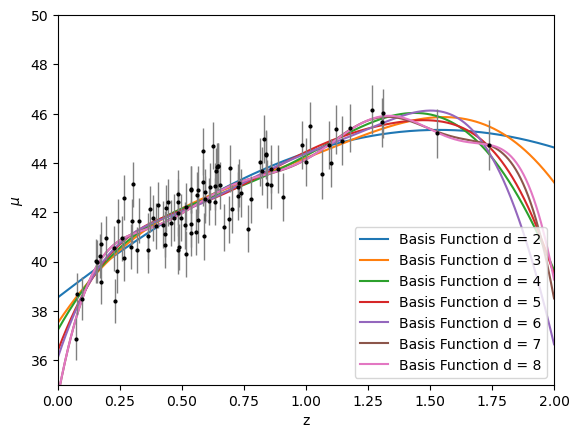

In [9]:
plt.figure()

for d in degrees:

    gauss_mean = np.linspace(0, 2, d)
    gauss_sigma = 1.0 * (gauss_mean[1] - gauss_mean[0]) 
    # With this definition of sigma, I'm picking a smaller sigma the higher the number
    # of gaussians I use to fit! (found on AstroML tutorials)
    
    BS_reg = BasisFunctionRegression('gaussian', mu = gauss_mean[:, np.newaxis], sigma = gauss_sigma)
    BS_reg.fit(z_sample[:, np.newaxis], mu_sample, dmu)
    
    plt.plot(z_grid, BS_reg.predict(z_grid[:, np.newaxis]),label='Basis Function d = '+str(d))

plt.errorbar(z_sample, mu_sample, dmu, ls ='', marker = 'o', markersize = 2, c = 'black', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

## Kernel regression

Here I try a kernel regression with a gaussian function

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/113896884.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


(35.0, 50.0)

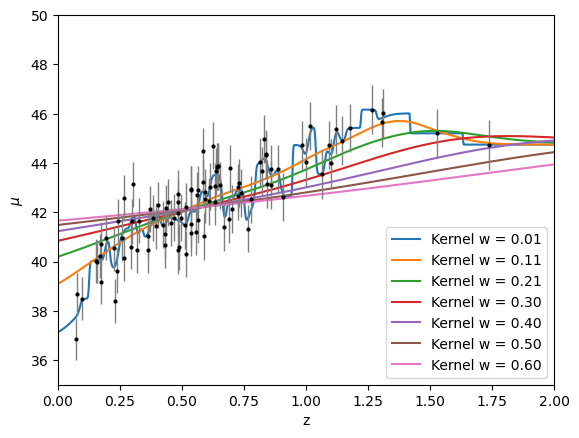

In [10]:
# Kernel regression:
# If the width is too low, you will overfit the data!

plt.figure()

widths = np.linspace(0.01, 0.6, 7)

for w in widths :
    NW_reg = NadarayaWatson(kernel = 'gaussian', h = w)
    
    NW_reg.fit(z_sample[:, np.newaxis], mu_sample, dmu)

    plt.plot(z_grid, NW_reg.predict(z_grid[:, np.newaxis]),label = 'Kernel w = %.02f' %w)

plt.errorbar(z_sample, mu_sample, dmu, ls ='', marker = 'o', markersize = 2, c = 'black', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)


## Cross validation on polynomials

Here I don't need to split in training and test sample for the moment, I just want to use my full dataset to find the best degree of the polynomial (same as having only a training set), not to evaluate the performances. If I divide in train and test sets, the data of the test set are useless in this case. The data are divided automatically by CV and Learning Curve functions in training and test set needed.

I think that shuffling the data is very important, in this way I am sure to get a good mixing between the redshifts in the CV and I am sure not to have a K-fold with only low (or high) redshift events.

Best degree of the polynomial from K-folding cv:  5


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_85005/489760024.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


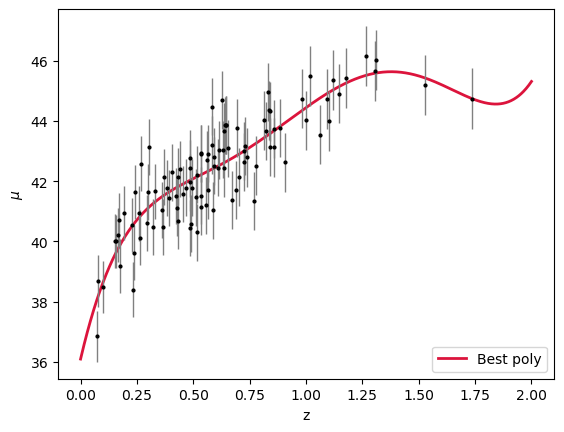

In [15]:
deg_cv = np.arange(2, 15)

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

GCV = GridSearchCV(PolynomialRegression(), {'degree': deg_cv}, scoring = 'neg_root_mean_squared_error', cv = cv, return_train_score = True)
GCV.fit(z_sample[:, np.newaxis], mu_sample, y_error = dmu)
best_deg = GCV.best_params_['degree']
print('Best degree of the polynomial from K-folding cv: ', best_deg)

Best_poly = PolynomialRegression(best_deg) 
Best_poly.fit(z_sample[:, np.newaxis], mu_sample, y_error = dmu)

plt.plot(z_grid, Best_poly.predict(z_grid[:, np.newaxis]), label = 'Best poly', lw = 2, color = 'crimson')
plt.errorbar(z_sample, mu_sample, dmu, ls ='', marker = 'o', markersize = 2, c = 'black', ecolor='gray', lw=1)

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')


## Validation and Learning curves

First of all, let's see how the models of different polynomials predict data, to do this I use the results of the CV on the training and evaluation sets.

Text(0, 0.5, 'RMS Error')

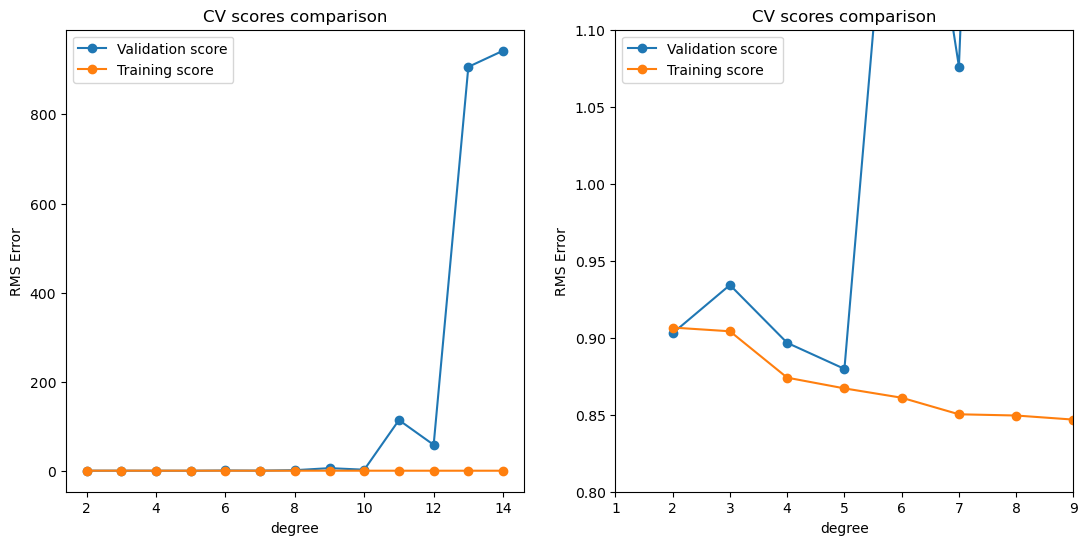

In [12]:
fig = plt.figure( figsize = (13,6))

ax = fig.add_subplot(121)
ax.plot(deg_cv, -GCV.cv_results_['mean_test_score'], marker = 'o', label = 'Validation score')
ax.plot(deg_cv, -GCV.cv_results_['mean_train_score'], marker = 'o', label = 'Training score')
plt.legend()
plt.title('CV scores comparison')
plt.xlabel('degree')
plt.ylabel('RMS Error')

ax = fig.add_subplot(122)
ax.plot(deg_cv, -GCV.cv_results_['mean_test_score'], marker = 'o', label = 'Validation score')
ax.plot(deg_cv, -GCV.cv_results_['mean_train_score'], marker = 'o', label = 'Training score')
ax.set_xlim(1, 9)
ax.set_ylim(0.8, 1.1)

plt.legend()
plt.title('CV scores comparison')
plt.xlabel('degree')
plt.ylabel('RMS Error')

When the degree of the polynomial increase, the overfitting becomes evident: The distance between the two curvs icrease, the training curve goes down instead the test curve blows up, that's because I'm loosing prediction ability on the test set!

In the plot on the right I can see that the best model on the evaluation is the deg = 5

Now I go with the learning curves

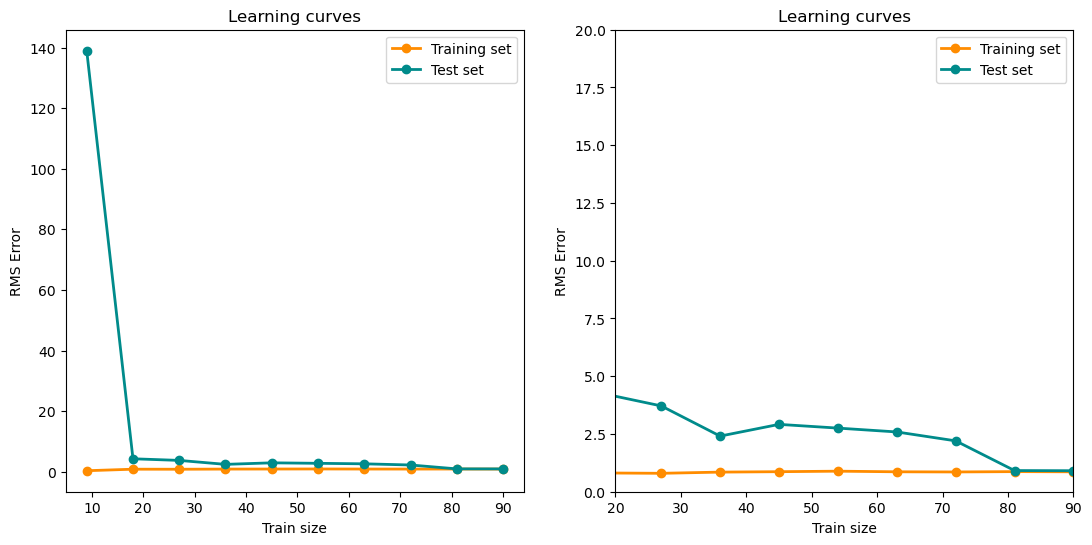

In [16]:
train_sizes = np.linspace(0.1, 1, 10)

# Shuffle the data!
z_sample, mu_sample = shuffle(z_sample, mu_sample)

data_size, train_scores, test_scores = learning_curve(PolynomialRegression(best_deg), z_sample[:, np.newaxis], mu_sample, train_sizes = train_sizes, cv = 10, scoring = 'neg_root_mean_squared_error')

train_mean = []
test_mean = []

for i in range(len(train_scores)):
    
    train_mean.append(np.mean(-train_scores[i]))
    test_mean.append(np.mean(-test_scores[i]))

fig = plt.figure( figsize = (13, 6))

ax = fig.add_subplot(121)
plt.plot(data_size, train_mean, lw = 2, marker = 'o', c = 'darkorange', label = 'Training set')
plt.plot(data_size, test_mean, lw = 2, marker = 'o', c = 'darkcyan', label = 'Test set')
plt.xlabel('Train size')
plt.ylabel('RMS Error')
plt.title('Learning curves')
plt.legend()

ax = fig.add_subplot(122)
plt.plot(data_size, train_mean, lw = 2, marker = 'o', c = 'darkorange', label = 'Training set')
plt.plot(data_size, test_mean, lw = 2, marker = 'o', c = 'darkcyan', label = 'Test set')
ax.set_xlim(20, 90)
ax.set_ylim(0, 20)
plt.xlabel('Train size')
plt.ylabel('RMS Error')
plt.title('Learning curves')
plt.legend()


## Bonus: CV for Basis function regression

In this case, I need to divide in training and test set because I'm not using a CV function of sklearn but I'm doing an 'handmade' CV with K = 1 (only train and test splitting). To improve it, I think I could increase the foldings manually making another splitting in training 1 and training 2, then train and test the algorithm on both subsets. I can do it many times to get a proper CV

In [3]:
def RMS (X, Y, func):

    return np.sqrt( np.sum(( Y - func.predict(X[:, np.newaxis]))**2) / len(X))

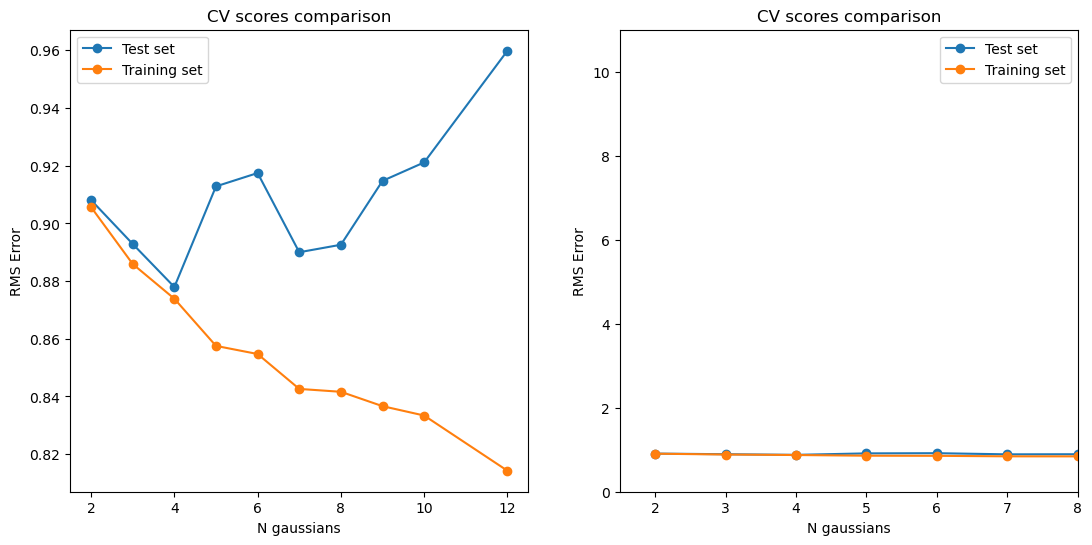

Best model:  4


In [4]:
train_vec, test_vec = [], []
gauss = np.linspace(2, 12, 10, dtype = int)

x_train, x_test, y_train, y_test = train_test_split(z_sample, mu_sample, test_size = 0.3)

for d in gauss:
    
    gauss_mean = np.linspace(0, 2, d) # lot of gaussians in the interval
    gauss_sigma = 1.0 * (gauss_mean[1] - gauss_mean[0])
    
    BFR = BasisFunctionRegression('gaussian', mu = gauss_mean[:, np.newaxis], sigma = gauss_sigma)
    BFR.fit(x_train[:, np.newaxis], y_train)
    RMS_train = RMS(x_train, y_train, BFR)
    RMS_test = RMS(x_test, y_test, BFR)
    train_vec.append(RMS_train)
    test_vec.append(RMS_test)

fig = plt.figure(figsize = (13, 6))
ax = fig.add_subplot(121)
ax.plot(gauss ,test_vec, marker = 'o', label = 'Test set')
ax.plot(gauss ,train_vec, marker = 'o', label = 'Training set')

ax.set_title('CV scores comparison')
ax.set_xlabel('N gaussians')
ax.set_ylabel('RMS Error')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(gauss ,test_vec, marker = 'o', label = 'Test set')
ax.plot(gauss ,train_vec, marker = 'o', label = 'Training set')
ax.set_xlim(1.5, 8)
ax.set_ylim(0, 11)

plt.legend()
ax.set_title('CV scores comparison')
ax.set_xlabel('N gaussians')
ax.set_ylabel('RMS Error')

plt.show()

best_model =  gauss[np.argmin(test_vec)]
print('Best model: ', gauss[np.argmin(test_vec)])

## Learning curves

[0.1        0.18888889 0.27777778 0.36666667 0.45555556 0.54444444
 0.63333333 0.72222222 0.81111111 0.9       ]


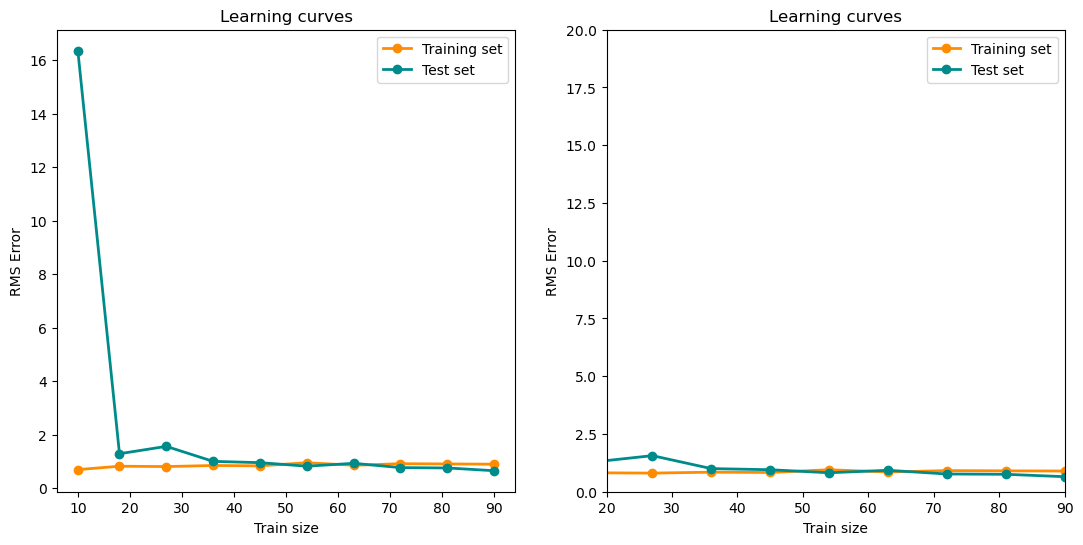

In [8]:
train_sizes = np.linspace(0.1, 0.9, 10)
print(train_sizes)
l_train = []
l_test = []
data_size = []

for t_size in train_sizes:
    
    x_train, x_test, y_train, y_test = train_test_split(z_sample, mu_sample, test_size = 1 - t_size)

    data_size.append(len(y_train))
    gauss_mean = np.linspace(0, 2, best_model) 
    gauss_sigma = 1.0 * (gauss_mean[1] - gauss_mean[0])

    BFR = BasisFunctionRegression('gaussian', mu = gauss_mean[:, np.newaxis], sigma = gauss_sigma)
    BFR.fit(x_train[:, np.newaxis], y_train)

    RMS_train = RMS(x_train, y_train, BFR)
    RMS_test = RMS(x_test, y_test, BFR)
    l_train.append(RMS_train)
    l_test.append(RMS_test)


fig = plt.figure( figsize = (13, 6))

ax = fig.add_subplot(121)
plt.plot(data_size, l_train, lw = 2, marker = 'o', c = 'darkorange', label = 'Training set')
plt.plot(data_size, l_test, lw = 2, marker = 'o', c = 'darkcyan', label = 'Test set')
plt.xlabel('Train size')
plt.ylabel('RMS Error')
plt.title('Learning curves')
plt.legend()

ax = fig.add_subplot(122)
plt.plot(data_size, l_train, lw = 2, marker = 'o', c = 'darkorange', label = 'Training set')
plt.plot(data_size, l_test, lw = 2, marker = 'o', c = 'darkcyan', label = 'Test set')
ax.set_xlim(20, 90)
ax.set_ylim(0, 20)
plt.xlabel('Train size')
plt.ylabel('RMS Error')
plt.title('Learning curves')
plt.legend()
